# PRVI SEMINARSKI RAD 2025

#### KOLEGIJ: Napredna teorija algoritama i sustava

#### Datum predaje rada: 10.06.2025.

#### Ime i prezime članova tima

1. Karlo Cvitak
2. Tihomir Popović
3. Ivan Prekratić
4. Renato Rak



## POSTUPAK


 1.	Preuzimanje zadataka (po timovima) iz LMS-a predmeta.
 2.	Rješenja zadataka u Jupyter Notebook obliku (tekstualni opis, kod,  rezultati, diskusija i zaključak) prema danom predlošku predati kao datoteku pod nazivom SEM1_TIMxy (xy - broj tima) u LMS predmeta. Rješenje predaje samo jedan član tima.
 3. Rješenja zadataka treba predati do 5. lipnja 2024. u 23:59 u LMS sustav. 

# OPIS ZADATKA

Korištenjem AVL balansiranog stabla implementirati stablo za indeksiranje zapisa iz baze podataka. Baza podataka u obliku tekstualne datoteke sadrži zapise o filmovima. Podatkovni skup je zadan u datoteci *movie.txt* te se sastoji od preko 500,000 zapisa. 

**Svaki tim će imati drugi podskup zapisa iz datoteke za obradu, a u obavijesti u LMS-u precizno je navedeno s kojim skupom zapisa koji tim rukuje.**

Prikaz isječka iz podatkovnog skupa:

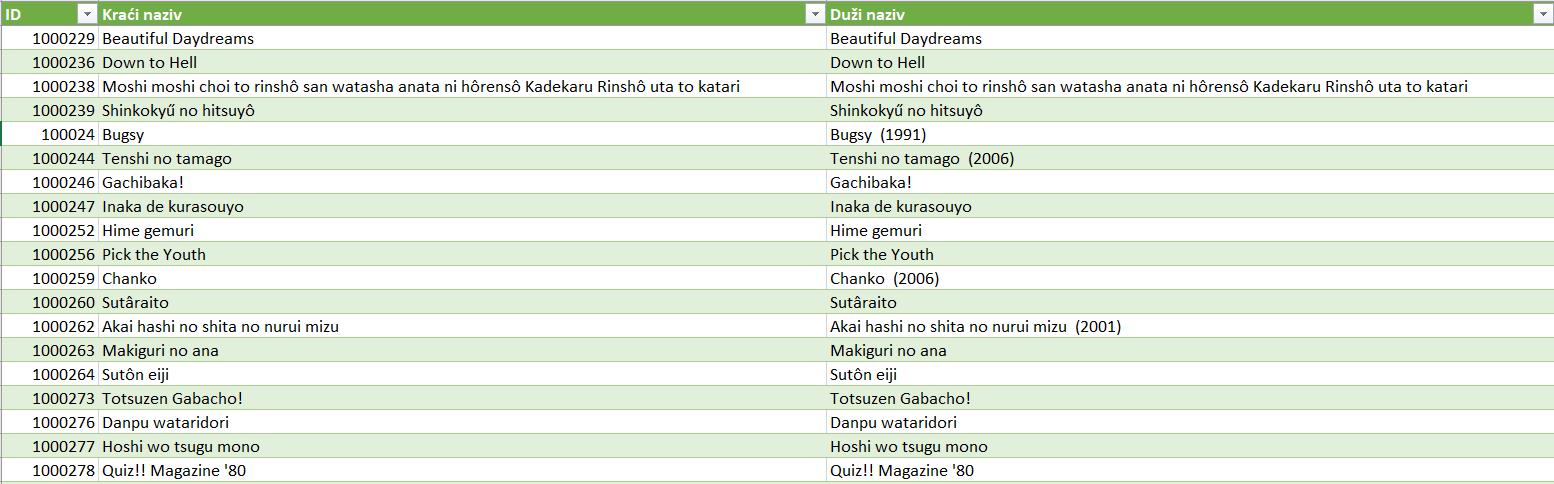

Struktura zapisa u datotekama je takva da su dijelovi odnosno polja zapisa odvojena tabulatorom ("\t") unutar jednog retka datoteke. Prilikom čitanja podataka, zapise iz datoteke treba čitati redak po redak te za svaki zapis izdvojiti dijelove zapisa kao zasebna polja te nad njima napraviti čišćenje praznih znakova. 

Prema tome treba realizirati odgovarajuću strukturu zapisa podatka, primjerice razred naziva *MoviesData*, za potrebe pohrane podataka iz datoteke a koja bi prema sadržaju zapisa trebao imati atribute koje se odnose na ID zapisa cjelobrojnog tipa te kraći i duži naziv filma tekstualnog tipa.
 
Stablo indeksa treba oblikovati po atributu koji se odnosi na kraći naziv filma.

Kao polazište implementacije zadataka mogu se iskoristiti kodovi koji su dani ispod te ih onda treba prilagoditi odnosno dopuniti sukladno zahtjevima zadataka:

* U razredu *BinaryNode*: potrebno je proširiti čvor stabla s objektom razreda *MoviesData*, a postojeća vrijednost *value* razreda *BinaryNode* bi trebala biti indeksni ključ. 
* Konstruktor odnosno \_\_init\_\_() metoda treba primiti dvije vrijednosti: ključ (*value*) i objekt navedenog tipa. 
* Metodu *add()* za umetanje novog čvora također treba urediti sukladno proširenju implementacije.

## ZADACI KOJE TREBA IMPLEMENTIRATI

a) Na temelju sadržaja tekstualne datoteke treba izgraditi AVL stablo uporabom razreda *BinaryTree* temeljem kraćeg naziva filma kao indeksnog ključa. Ispisati visinu dobivenog AVL stabla.

b) Implementirati pretraživanje podataka o filmu uporabom implementiranog indeksa i to tako da se za traženje može zadati kraći naziv filma cjelovito ili djelomično u obliku prefiksa korištenjem znaka '\*'. Primjerice, može se unijeti cjeloviti naziv 'Bugsy' ili samo dio odnosno prefiks naziva 'Bug*'. Nakon što je podatak pronađen treba ispisati cijeli zapis: ID, kraći naziv, duži naziv.

c) Implementirati funkciju za traženje u rangu npr. sve filmove od '*Pick*' do '*Ten*', ili od '*F*' do '*M*'. Rangove treba moći zadati proizvoljno.

d) Ispisati minimalnu i maksimalnu vrijednost indeksa i pripadnih podataka za te indekse.

e) Napraviti metode za ispis broja lijevih rotacija i broja desnih rotacija kod umetanja čvora u stablo.

f) Ispisati stablo po razinama počevši od korijena prema dolje u cik-cak redoslijedu. To znači da se čvorovi na prvoj razini ispisuju s lijeva na desno, na drugoj razini s desna na lijevo, pa na trećoj razini s lijeva na desno itd. Ispis raditi po razinama, odnosno svaku razinu ispisati u posebnom retku.
Primjer za stablo na slici treba dobiti sljedeći ispis: 

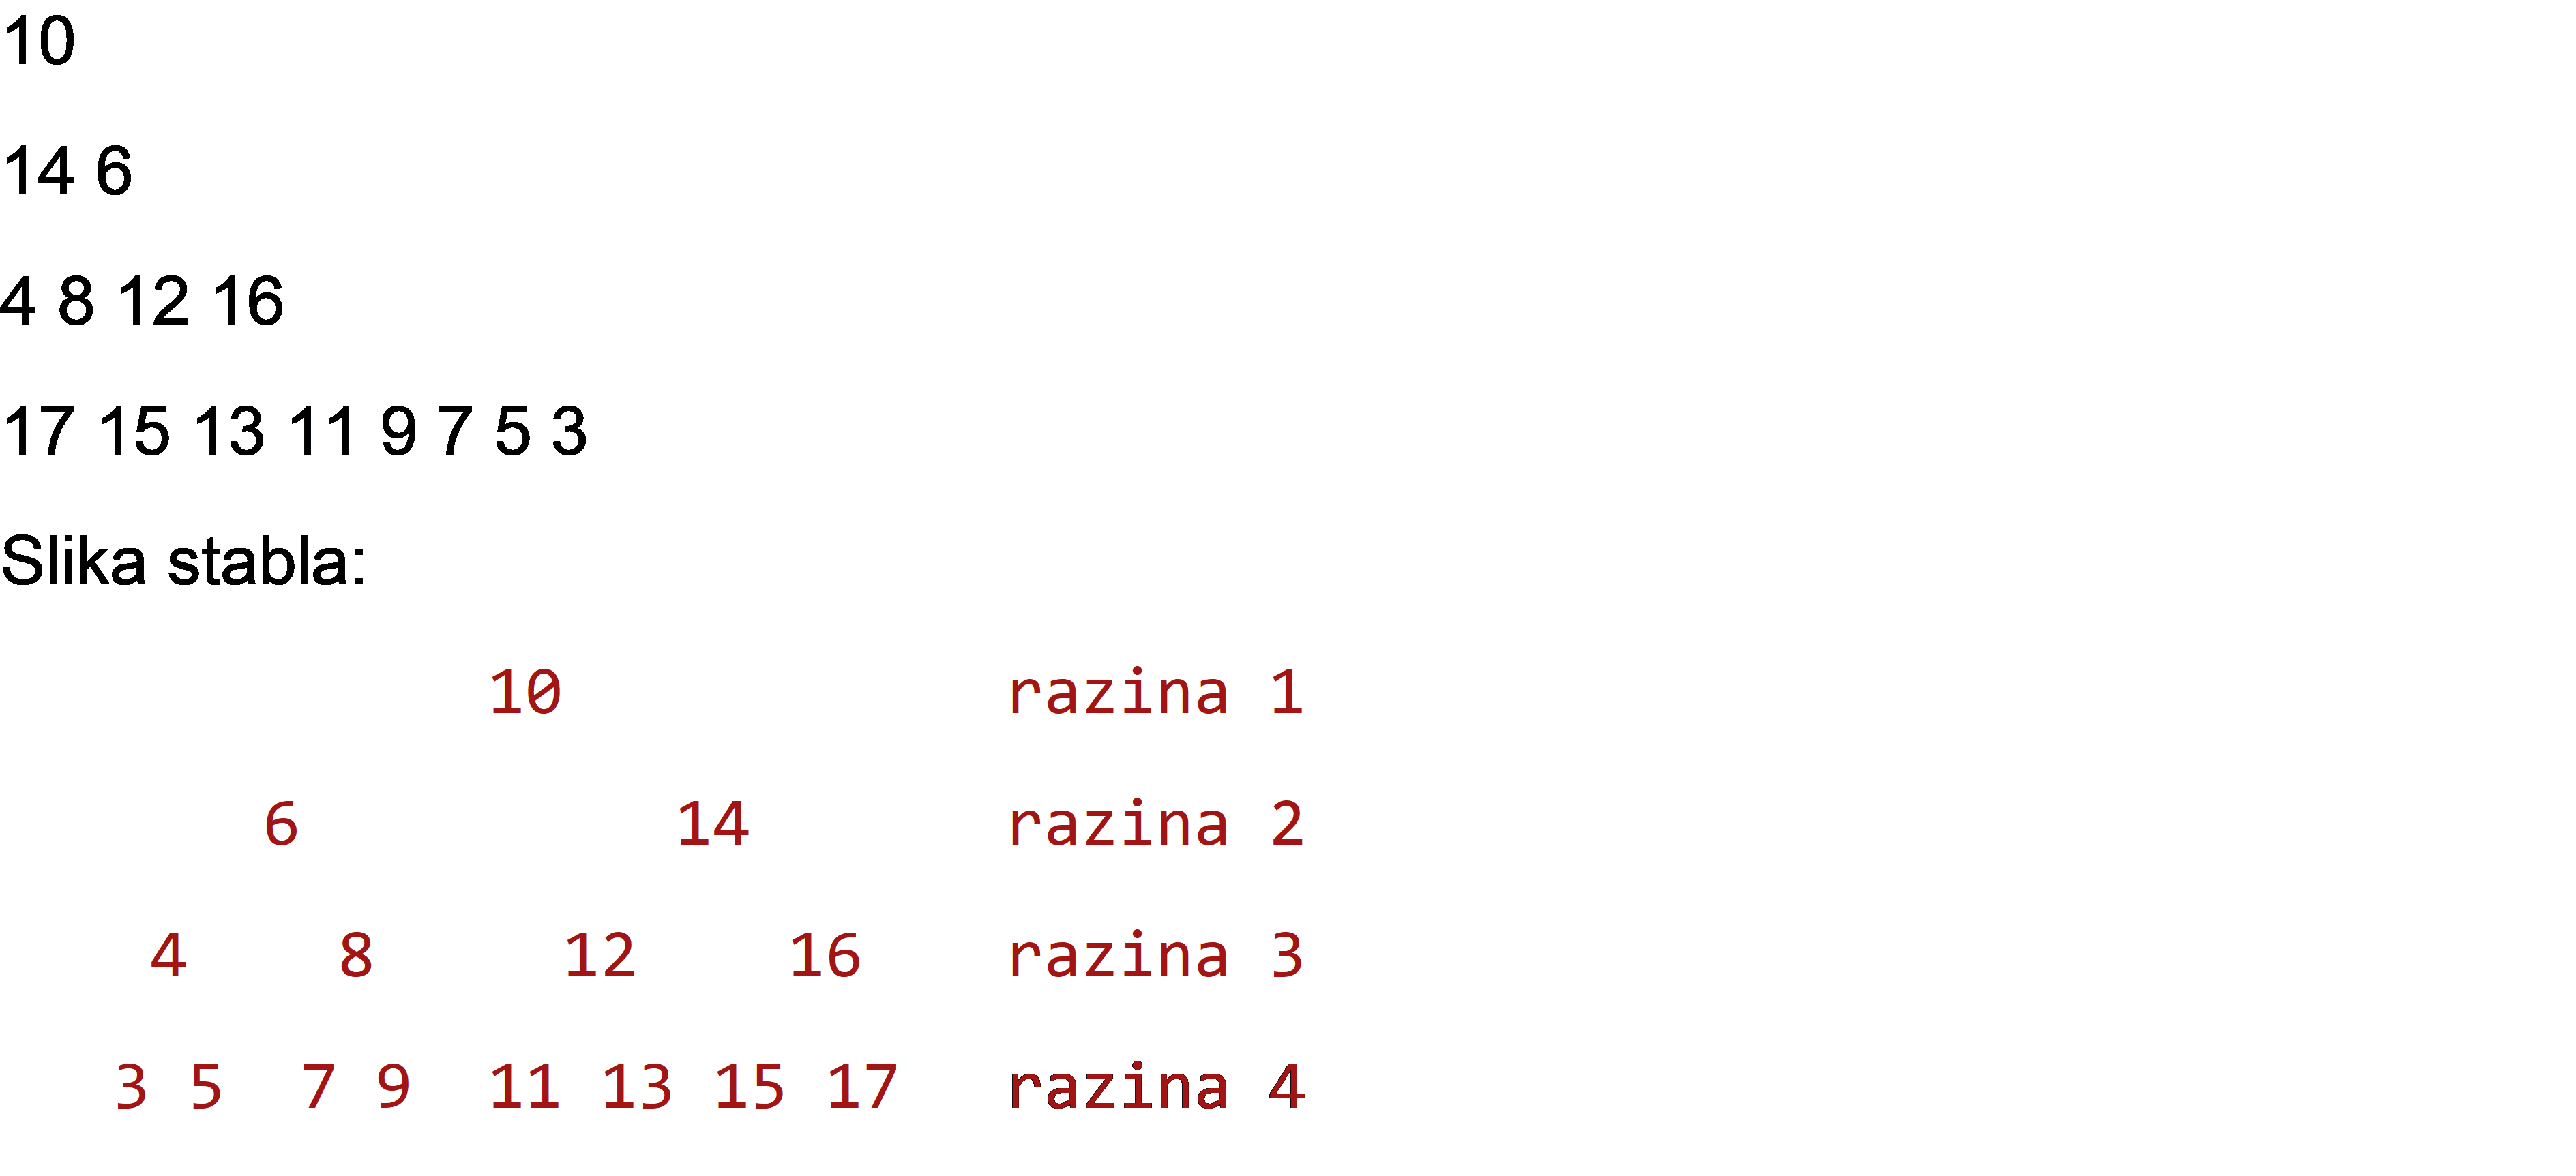

Zbog velikog broja podataka dovoljno je ispisati samo prvih 10 razina. 

g) Nasumično birati zapise iz skupa podataka i graditi obično nebalansirano binarno stablo pretraživanja sve dok je to moguće. Zabilježiti visinu takvog nebalansiranog stabla te ponoviti postupak za isti niz zapisa u izgradnji AVL stabla za koji također treba zabilježiti visinu dobivenog stabla.

# SADRŽAJ RADA

## Opis i analiza složenosti poduzetih postupaka 



Opis implementacije i analiza složenosti rješenja zadataka.
Napomena: Dati opis samo onog koda koji je vlastiti timu.

### a) AVL stablo filmova i visina stabla
Klasa *Movie* se sastoji od polja *id*, *title* i *long_title* koji odgovaraju poljima ID, kraći naziv i duži naziv iz seta podataka.

Klasa *MovieNode* nasljeđuje klasu *BinaryNode* i dodaje joj polje *movie* tipa *Movie*. Konstuktor ostaji isti kao i od *BinaryNode* ali uz dodatno postavljanje polja *movie*. Također su preopterečene metode *add*, *addToSubTree* i *newNode* kako bi radile ne samo s *value*, nego i *movie* poljem.

Klasa *MovieTree* nasljeđuje klasu *BinaryTree*. Konstruktor ostaje isti, a *add* i *newNode* metode se preopterečuju kako bi radile s *Movie* tipom podataka i stvarale *MovieNode* umjesto *BinaryNode*.

Metoda *loadMovies* otvara datoteku *movie.txt* i iz nje čita svaki 11. redak počevši od 4. jer smo mi TIM04. Svaki redak se podijeli na djelove po tabulatoru koji će kasnije postati *id*, *title* i *long_title*. Ti djelovi se počiste tako da im se obrišu prazni znakovi s početka i kraja, te se nakon toga od njih konstruira instance *Movie* klase koja se dodaje u listu.

Nakon toga se konstruira nova instanca *MovieTree* klase i svaki element *movies* liste se dodaje u *movie_tree* pomoću metode *add*.

Implementacije *MovieNode* i *BinaryNode* klasa imaju automatsko računanje visine, pa za dobiti visinu stabla se koristi automatski izračunata visina korijena.

### b) Cjelovito pretraživanje i pretraživanje po prefiksu
Pretraživanje se radi pomoću *find* metode u *MovieTree* klasi. *find* metoda prima teks po kojem se pretražuje i vraća list *Movie* instanci. U slučaju da ne postoji korijen stabla vraća se prazna lista. U slučaju cjelovitog pretraživanja vraća se lista s jednim elementom ako je pronađen i prazna lista ako element nije pronađen. U slučaju pretrage po prefiksu, vraća se lista sa svim pronađenim elementima. Ako je *find* metoda pozvana s tekstom koji završava s '*' onda će se raditi pretraživanje po prefiksu, a inače će se raditi cjelovito pretraživanje.

Za cjelovito pretraživanje se koristi normalni algoritam za pretragu u binarnom stablu pretraživanja. Počinje s pozivom *find_exact* metode na korijenu i ako je trenutni element onaj koje se traži onda se vraća. Ako je trenutni element veći od traženog i postoji lijeva grana onda se rekurzivno poziva *find_exact* na lijevoj grani. Ako je trenutni element manji od traženog i postoji desna grana onda se rekurzivno poziva *find_exact* na desnoj grani. O-notacija ove pretrage je O(h) tj. O(log(n)).

Za pretraživanje po prefiksu se koristi *find_by_range* metoda gdje je početak i kraj ranga isti tekst za pretraživanje iz *find* metode. Za pretraživanje po prefiksu vrijedi sve isto što i za pretraživanje po rangu koje će biti opisano u sljedečem poglavlju.

### c) Pretraživanje po rangu
Pretraživanje po rangu se radi pomoću *find_by_range* metode u *MovieTree* klasi. Ta metoda prima tekst *start* i tekst *end* koje koristi za pretragu. *find_by_range* prvo stvara praznu listu *results* koja će služiti za spremanje rezultata, te poziva unutarnju funkciju *_find* s korijenom stabla. *_find* funkcija radi na sličan princip kao i algoritam za cjelovito pretraživanje. Varijabla *startingSubstring* dobiva vrijednost prvih n znakova indeksnog ključa trenutnog elementa, gdje je n dužina *start* teksta. Varijabla *endingSubstring* dobiva isto, ali za dužinu *end* teksta. Ako je *startingSubstring* veći ili jednak *start* tekstu i ako je *endingSubstring* manji ili jednak *end* tekstu onda će se prvo rekurzivno pozvati *_find* za lijevi element, nakon čega će se u rezultate dodati trenutni element, te će se onda rekurzivno pozvati *_find* za desni element. Nakon toga, slično kao i za cjelovitu pretragu, ako je *endingSubstring* veći od *end* onda će se pozvati *_find* za lijevi element, te ako je *startingSubstring* manji od *start* onda će se rekurzivno pozvati *_find* na desni element.

O-notacija pretraživanja po rangu za slučaj kada će u rezultatu biti samo jedan ili malo elemenata je O(h) tj. O(log(n)), a u slučaju kada su u rezultatu svi ili mnogo elemenata biti će O(n).

## Prikaz rezultata

Opisati primijenjene ispitne slučajeve i komentirati rezultate.

### a) AVL stablo filmova i visina stabla
Dodavanjem 52541 filmova iz seta podataka dobivamo stablo visine 18.
Idealna visina stabla bi bila log<sub>2</sub>(52541) = 15.681 što je otprilike jednako 18.

### b) Cjelovito pretraživanje i pretraživanje po prefiksu
Za cjelovito pretraživanje odabrao se nasumični film iz liste filmova i nakon poziva *find* metode s kratkim naslovom tog filma kao rezultat se dobiva lista s jednim elementom. Taj jedan element je potvrđen da je jednak nasumično odabranom elementu.

Za pretraživanje po prefiksu odabran je takav prefiks koji vraća točno 10 rezultata u listi. Na temelju tog prefiksa pozvana je metoda *find*. Kako bi se potvrdila ispravnost, iz originalne liste filmova ručno su izdvojeni filmovi s istim prefiksom, te je provjereno da su rezultati pretrage jednaki tim filmovima.

### c) Pretraživanje po rangu
Za pretraživanje po rangu je odabran *start* i *end* tekst koji vraća mali broj filmova kao rezultat. Kako bi se potvrdila funkcionalnost, iz orginalne liste filmova su filtrirani oni filmovi čiji je naziv u tom rangu, te je provjereno da su rezultati pretrage jednaki tim filmovima.

## Zaključak

Kratki zaključak. 

## Literatura

Popis literature:

[1] Lit1

[2] Lit2


# POČETNI PROGRAMSKI KÔD

#### Implementacija AVL stabla

In [1]:
class BinaryNode:

    def __init__ (self, value = None):
        """Create binary node."""
        self.value  = value
        self.left   = None
        self.right  = None
        self.height = 0
        
        
    def computeHeight (self):
        """Compute height of node in BST."""
        height = -1
        if self.left:
            height = max(height, self.left.height)
        if self.right:
            height = max(height, self.right.height)
            
        self.height = height + 1

    def dynamicHeight (self):
        """Compute height of node in BST."""
        height = -1
        if self.left:
            height = max(height, self.left.dynamicHeight())
        if self.right:
            height = max(height, self.right.dynamicHeight())
            
        return height + 1

    def dynamicHeightDifference (self):
        """Compute height difference of node's children in BST."""
        leftTarget = 0
        rightTarget = 0
        if self.left:
            leftTarget = 1 + self.left.dynamicHeight()
        if self.right:
            rightTarget = 1 + self.right.dynamicHeight()
            
        return leftTarget - rightTarget

    def heightDifference (self):
        """Compute height difference of node's children in BST."""
        leftTarget = 0
        rightTarget = 0
        if self.left:
            leftTarget = 1 + self.left.height
        if self.right:
             rightTarget = 1 + self.right.height
                   
        return leftTarget - rightTarget

    def assertAVLProperty (self):
        """Validate AVL property for BST node."""
        if abs(self.dynamicHeightDifference()) > 1:
            return False
        if self.left:
            if not self.left.assertAVLProperty():
                return False
        if self.right:
            if not self.right.assertAVLProperty():
                return False

        return True

    def rotateRight (self):
        """Perform right rotation around given node."""
        newRoot = self.left
        grandson = newRoot.right
        self.left = grandson
        newRoot.right = self

        self.computeHeight()
        
        return newRoot

    def rotateLeft (self):
        """Perform left rotation around given node."""
        newRoot = self.right
        grandson = newRoot.left
        self.right = grandson
        newRoot.left = self
    
        self.computeHeight()
        return newRoot

    def rotateLeftRight (self):
        """Perform left, then right rotation around given node."""
        child = self.left
        newRoot = child.right
        grand1  = newRoot.left
        grand2  = newRoot.right
        child.right = grand1
        self.left = grand2
    
        newRoot.left = child
        newRoot.right = self
    
        child.computeHeight()
        self.computeHeight()
        
        return newRoot

    def rotateRightLeft (self):
        """Perform right, then left rotation around given node."""
        child = self.right
        newRoot = child.left
        grand1  = newRoot.left
        grand2  = newRoot.right
        child.left = grand2
        self.right = grand1
    
        newRoot.left = self
        newRoot.right = child
    
        child.computeHeight()
        self.computeHeight()
      
        return newRoot

    def compareTo (self, value):
        """
        Returns 0 if equal, negative if smaller and positive if greater.
        Suitable for overriding.
        """
        if self.value == value:
            return 0
        if self.value < value:
            return -1
        return +1
        
    def add (self, val):
        """Adds a new node to BST with value and rebalance as needed."""
        newRoot = self

        # if val <= self.value        
        if self.compareTo(val) >= 0:
            self.left = self.addToSubTree (self.left, val)
            if self.heightDifference() == 2:
                #if val <= self.left.value:
                
                if self.left.compareTo(val) >= 0:
                    newRoot = self.rotateRight()
                else:
                    newRoot = self.rotateLeftRight()
        else:
            self.right = self.addToSubTree (self.right, val)
            if self.heightDifference() == -2:
                #if val > self.right.value:
                if self.right.compareTo(val) < 0:
                    newRoot = self.rotateLeft()
                else:
                    newRoot = self.rotateRightLeft()

        newRoot.computeHeight()
        return newRoot

    def newNode (self, val):
        """Return new Binary Node, amenable to subclassing."""
        return BinaryNode(val)

    def addToSubTree (self, parent, val):
        """Add val to parent subtree (if exists) and return root in case it has changed because of rotation."""
        if parent is None:
            return self.newNode(val)

        parent = parent.add(val)
        return parent
           
    def removeFromParent (self, parent, val):
        """Helper method for remove. Ensures proper behavior when removing node that 
        has children."""
        if parent:
            return parent.remove(val)
        return None

    def remove (self, val):
        """
         Remove val from BinaryTree. Works in conjunction with remove
         method in BinaryTree.
        """
        newRoot = self
        rc = self.compareTo(val)
        if rc == 0:
            if self.left is None:
                return self.right

            child = self.left
            while child.right:
                child = child.right
            
            childKey = child.value;
            self.left = self.removeFromParent(self.left, childKey)
            self.value = childKey;

            if self.heightDifference() == -2:
                if self.right.heightDifference() <= 0:
                    newRoot = self.rotateLeft()
                else:
                    newRoot = self.rotateRightLeft()
        elif rc > 0:
            self.left = self.removeFromParent(self.left, val)
            if self.heightDifference() == -2:
                if self.right.heightDifference() <= 0:
                    newRoot = self.rotateLeft()
                else:
                    newRoot = self.rotateRightLeft()
        else:
            self.right = self.removeFromParent(self.right, val)
            if self.heightDifference() == 2:
                if self.left.heightDifference() >= 0:
                    newRoot = self.rotateRight()
                else:
                    newRoot = self.rotateLeftRight()

        newRoot.computeHeight()
        return newRoot

    def __repr__ (self):
        """Useful debugging function to produce linear tree representation."""
        leftS = ''
        rightS = ''
        if self.left:
            leftS = str(self.left)
        if self.right:
            rightS = str(self.right)
        return "(L:" + leftS + " " + str(self.value) + " R:" + rightS + ")"

    def inorder (self):
        """In order traversal generator of tree rooted at given node."""
        if self.left:
            for n in self.left.inorder():
                yield n

        yield self.value

        if self.right:
            for n in self.right.inorder():
                yield n

class BinaryTree:

    def __init__ (self):
        """Create empty binary tree."""
        self.root = None

    def __repr__ (self):
        if self.root is None:
            return "avl:()"
        return "avl:" + str(self.root)
                
    def newNode (self, value):
        """Return new BinaryNode object. Suitable for overriding."""
        return BinaryNode(value)
    
    def add (self, value):
        """Insert value into proper location in Binary Tree."""
        if self.root is None:
            self.root = self.newNode(value)
        else:
            self.root = self.root.add(value)

    def __contains__ (self, target):
        """Check whether BST contains target value."""
        node = self.root
        while node:
            rc = node.compareTo(target)
            if rc > 0:
                node = node.left
            elif rc < 0:
                node = node.right
            else:
                return True
        return False

           
    def remove (self, val):
        """Remove value from tree."""
        if self.root:
            self.root = self.root.remove(val)

    def __iter__ (self):          # definira iteriranje kroz inorder ispis
        """In order traversal of elements in the tree."""
        if self.root:
            return self.root.inorder()
                        
    def assertAVLProperty (self):
        """Validate AVL property for BST Tree."""
        if self.root:
            return self.root.assertAVLProperty()
        else:
            return True

#### Primjer koda (s cjelobrojnim ključevima) za rukovanje AVL stablom.

In [2]:
if __name__ == '__main__':
    import random
    myTree = BinaryTree() 
    
    # umetanje nasumične vrijednosti u stablo
    vals = []
    for _ in range(8000):
        n = random.randint(1,10000)
        vals.append(n)
        if not n in myTree:
            myTree.add(n)
      

    #  iteriranje kroz stablo - inorder() - samo ispis vrijednosti između 100 i 200
    #  koristi se metoda __iter__()
    for x in myTree:   
        if x > 100 and x < 200:
            print(x)

    # remove all
    for r in vals:
        myTree.remove(r)
        

106
107
109
110
111
113
114
115
116
118
119
120
122
126
128
130
132
133
134
135
138
139
140
142
143
145
147
148
150
151
153
154
158
159
161
163
164
165
166
169
170
172
179
182
186
187
188
191
192
194
196
198
199


# IMPLEMENTACIJA ISPITNOG KODA SUKLADNO ZADACIMA

Za svaki ispitni kôd formirati posebni pokretač:



In [45]:
from collections import deque

class Movie:
    def __init__(self, id: int, title: str, long_title: str):
        self.id = int(id)
        self.title = str(title)
        self.long_title = str(long_title)

    def __repr__(self):
        return f"Movie(id={self.id}, title='{self.title}', long_title='{self.long_title}')"
    
    def __eq__(self, other):
        if isinstance(other, Movie):
            return self.id == other.id
        return False

class MovieNode(BinaryNode):
    def __init__(self, value: str, movie: Movie):
        super().__init__(value)
        self.movie = movie

    def add (self, val: str, movie: Movie):
        newRoot = self

        # if val <= self.value        
        if self.compareTo(val) >= 0:
            self.left = self.addToSubTree (self.left, val, movie)
            if self.heightDifference() == 2:
                #if val <= self.left.value:
                
                if self.left.compareTo(val) >= 0:
                    newRoot = self.rotateRight()
                else:
                    newRoot = self.rotateLeftRight()
        else:
            self.right = self.addToSubTree (self.right, val, movie)
            if self.heightDifference() == -2:
                #if val > self.right.value:
                if self.right.compareTo(val) < 0:
                    newRoot = self.rotateLeft()
                else:
                    newRoot = self.rotateRightLeft()

        newRoot.computeHeight()
        return newRoot

    def addToSubTree (self, parent, value: str, movie: Movie):
        if parent is None:
            return self.newNode(value, movie)

        parent = parent.add(value, movie)
        return parent
    
    def newNode (self, value: str, movie: Movie):
        return MovieNode(value, movie)
    
    def find_exact (self, title: str) -> Movie:
        match self.compareTo(title):
            case 0:
                return self.movie
            case 1:
                if self.left:
                    return self.left.find_exact(title)
            case -1:
                if self.right:
                    return self.right.find_exact(title)
        return None
    

class MovieTree(BinaryTree):
    def __init__(self):
        super().__init__()

    def newNode (self, value: str, movie: Movie):
        """Return new MovieNode object."""
        return MovieNode(value, movie)

    def add (self, movie: Movie):
        """Insert movie into proper location in Movie Tree."""
        if self.root is None:
            self.root = self.newNode(movie.title, movie)
        else:
            self.root = self.root.add(movie.title, movie)

    def find (self, title: str) -> list[Movie]:
        if self.root is None:
            return []
        
        if title.endswith('*'):
            return self.find_by_range(title[:-1], title[:-1])
        
        movie = self.root.find_exact(title)
        if movie:
            return [movie]
        else:
            return []
    
    def find_by_range (self, start: str, end: str) -> list[Movie]:
        if self.root is None:
            return []
        
        results = []

        def _find(node: MovieNode):
            if node is None:
                return
            
            startingSubstring = node.value[:len(start)]
            endingSubstring = node.value[:len(end)]
            
            if startingSubstring >= start and endingSubstring <= end:
                _find(node.left)
                results.append(node.movie)
                _find(node.right)
            elif endingSubstring > end:
                _find(node.left)
            elif startingSubstring < start:
                _find(node.right)
        
        _find(self.root)
        return results
    
    def find_min_node (self) -> MovieNode:
        if self.root is None:
            return None
        
        node = self.root
        while node.left:
            node = node.left
        return node

    def find_max_node (self) -> MovieNode:
        if self.root is None:
            return None
        
        node = self.root
        while node.right:
            node = node.right
        return node
    
    def print_zigzag (self, max_depth: int):
        current_depth = 0
        queue = deque([self.root])
        left_to_right = True

        while queue and current_depth < max_depth:
            level_size = len(queue)
            level_nodes = deque()

            for _ in range(level_size):
                node = queue.popleft()
                
                if left_to_right:
                    level_nodes.append(node.value)
                else:
                    level_nodes.appendleft(node.value)
                
                if node.left:
                    queue.append(node.left)
                if node.right:
                    queue.append(node.right)
            
            left_to_right = not left_to_right
            current_depth += 1
            print('   |   '.join(level_nodes))



def loadMovies():
    movies = []
    with open('./movie.txt', 'r') as f:
        for i, line in enumerate(f):
            if (i - 3) % 11 == 0:
                parts = line.strip().split('\t')
                if len(parts) >= 3:
                    id = int(parts[0].strip())
                    title = parts[1].strip()
                    long_title = parts[2].strip()
                    movies.append(Movie(id, title, long_title))
    return movies
    



In [ ]:
# a) Na temelju sadržaja tekstualne datoteke treba izgraditi AVL stablo uporabom razreda *BinaryTree* 
# temeljem kraćeg naziva filma kao indeksnog ključa. Ispisati visinu dobivenog AVL stabla.


if __name__ == '__main__':
    movies = loadMovies()
    print(f"Loaded {len(movies)} movies.")
    movie_tree = MovieTree()
    for movie in movies:
        movie_tree.add(movie)
    print("Height of movie tree: ", movie_tree.root.height)

Loaded 52541 movies.
Height of movie tree:  18


In [26]:
# b) Implementirati pretraživanje podataka o filmu uporabom implementiranog indeksa i to tako da se za traženje može zadati kraći naziv filma cjelovito 
# ili djelomično u obliku prefiksa korištenjem znaka '\*'. Primjerice, može se unijeti cjeloviti naziv 'Bugsy' ili samo dio odnosno prefiks naziva 'Bug*'. 
# Nakon što je podatak pronađen treba ispisati cijeli zapis: ID, kraći naziv, duži naziv.

if __name__ == '__main__':
    movies = loadMovies()
    movie_tree = MovieTree()
    for movie in movies:
        movie_tree.add(movie)

    # search for a specific movie by exact title
    expected_movie = movies[42]
    print("Expected movie:", expected_movie.title)
    actual_movie = movie_tree.find(expected_movie.title)
    print("Actual movie:", actual_movie)
    assert actual_movie[0] == expected_movie, "The movie found does not match the expected movie."
    print("Found the expected movie by exact title.")

    # search for movies by prefix
    prefix = "Ord*"
    expected_movies = [m for m in movies if m.title.startswith(prefix[:-1])]
    actual_movies = movie_tree.find(prefix)
    print("\nExpected:")
    for m in expected_movies:
        print(m)
    print("\nActual:")
    for m in actual_movies:
        print(m)
    assert len(actual_movies) == len(expected_movies), "The number of movies found does not match the expected number."
    for m in actual_movies:
        assert m in expected_movies, f"Movie {m.title} not found in expected results."
    for m in expected_movies:
        assert m in actual_movies, f"Expected movie {m.title} not found in actual results."
    print("Found all expected movies by prefix.")


Expected movie: Ordre du roy
Actual movie: [Movie(id=100146, title='Ordre du roy', long_title='Ordre du roy')]
Found the expected movie by exact title.

Expected:
Movie(id=100146, title='Ordre du roy', long_title='Ordre du roy')
Movie(id=1059334, title='Orders Is Orders', long_title='Orders Is Orders  (1934)')
Movie(id=1484213, title='Orden y caos', long_title='Orden y caos')
Movie(id=23171, title='Order Up', long_title='Order Up')
Movie(id=242152, title='Ordinary Men', long_title='Ordinary Men  (2010)')
Movie(id=362398, title='Ordet på bordet', long_title='Ordet på bordet')
Movie(id=709679, title='Order!', long_title='Order!')
Movie(id=805543, title='Ordo', long_title='Ordo  (2004)')
Movie(id=838885, title='Ordinary Angels', long_title='Ordinary Angels  (2007)')
Movie(id=964314, title='Order 9088', long_title='Order 9088  (2008)')

Actual:
Movie(id=1484213, title='Orden y caos', long_title='Orden y caos')
Movie(id=964314, title='Order 9088', long_title='Order 9088  (2008)')
Movie(id=2

In [33]:
# c) Implementirati funkciju za traženje u rangu npr. sve filmove od 'Pick' do 'Ten', ili od 'F' do 'M'.
# Rangove treba moći zadati proizvoljno.

if __name__ == '__main__':
    movies = loadMovies()
    movie_tree = MovieTree()
    for movie in movies:
        movie_tree.add(movie)
    
    start = 'A Bad'
    end = 'A Bal'
    expected = [movie for movie in movies if movie.title.startswith(start) or movie.title.startswith(end)]
    actual = movie_tree.find_by_range(start, end)

    print("Expected:")
    for movie in expected:
        print(movie)
    print("\nActual:")
    for movie in actual:
        print(movie)
    
    # assert that they are the same
    assert len(expected) == len(actual), "Number of movies in range does not match"
    for movie in expected:
        assert movie in actual, f"Movie {movie} not found in actual results"
    for movie in actual:
        assert movie in expected, f"Movie {movie} not found in expected results"
    print("\nAll movies in range match expected results.")


Expected:
Movie(id=171885, title='A Bad Little Good Man', long_title='A Bad Little Good Man')
Movie(id=2333310, title='A Balanced Natural Pregnancy', long_title='A Balanced Natural Pregnancy')
Movie(id=350435, title='A Bad Tangle', long_title='A Bad Tangle  (1912)')
Movie(id=688692, title='A Bad Day', long_title='A Bad Day  (2006)')
Movie(id=985068, title='A Bad Investment', long_title='A Bad Investment')

Actual:
Movie(id=688692, title='A Bad Day', long_title='A Bad Day  (2006)')
Movie(id=985068, title='A Bad Investment', long_title='A Bad Investment')
Movie(id=171885, title='A Bad Little Good Man', long_title='A Bad Little Good Man')
Movie(id=350435, title='A Bad Tangle', long_title='A Bad Tangle  (1912)')
Movie(id=2333310, title='A Balanced Natural Pregnancy', long_title='A Balanced Natural Pregnancy')

All movies in range match expected results.


In [37]:
# d) Ispisati minimalnu i maksimalnu vrijednost indeksa i pripadnih podataka za te indekse.

if __name__ == '__main__':
    movies = loadMovies()
    movie_tree = MovieTree()
    for movie in movies:
        movie_tree.add(movie)

    movies.sort(key=lambda m: m.title)
    expected_min_value = movies[0]
    expected_max_value = movies[-1]
    print("Expected min:", expected_min_value)
    print("Expected max:", expected_max_value)
    actual_min = movie_tree.find_min_node()
    actual_max = movie_tree.find_max_node()
    print("Actual min index:", actual_min.value)
    print("Actual min:", actual_min.movie)
    print("Actual max index:", actual_max.value)
    print("Actual max:", actual_max.movie)
    assert actual_min.movie == expected_min_value, "Minimum movie does not match expected"
    assert actual_max.movie == expected_max_value, "Maximum movie does not match expected"
    print("Minimum and maximum movies match expected results.")

Expected min: Movie(id=386554, title='#OMGIMTRENDING', long_title='#OMGIMTRENDING  (2011)')
Expected max: Movie(id=256358, title='Þetta er ekkert mál', long_title='Þetta er ekkert mál')
Actual min index: #OMGIMTRENDING
Actual min: Movie(id=386554, title='#OMGIMTRENDING', long_title='#OMGIMTRENDING  (2011)')
Actual max index: Þetta er ekkert mál
Actual max: Movie(id=256358, title='Þetta er ekkert mál', long_title='Þetta er ekkert mál')
Minimum and maximum movies match expected results.


In [51]:
# e) Napraviti metode za ispis broja lijevih rotacija i broja desnih rotacija kod umetanja čvora u stablo.

from collections.abc import Callable

class MovieNodeWithRotationTracking(MovieNode):
    def __init__(self, value: str, movie: Movie, left_rotation_callback: Callable[[], None], right_rotation_callback: Callable[[], None]):
        super().__init__(value, movie)
        self.left_rotation_callback = left_rotation_callback
        self.right_rotation_callback = right_rotation_callback

    def rotateRight(self):
        self.right_rotation_callback()
        return super().rotateRight()

    def rotateLeft(self):
        self.left_rotation_callback()
        return super().rotateLeft()
    
    def rotateLeftRight(self):
        self.left_rotation_callback()
        self.right_rotation_callback()
        return super().rotateLeftRight()
    
    def rotateRightLeft(self):
        self.right_rotation_callback()
        self.left_rotation_callback()
        return super().rotateRightLeft()
    
    def newNode (self, value: str, movie: Movie):
        return MovieNodeWithRotationTracking(value, movie, self.left_rotation_callback, self.right_rotation_callback)
    
class MovieTreeWithRotationTracking(MovieTree):
    def __init__(self):
        super().__init__()
        self.left_rotations = 0
        self.right_rotations = 0

    def left_rotation_callback(self):
        self.left_rotations += 1

    def right_rotation_callback(self):
        self.right_rotations += 1

    def newNode(self, value: str, movie: Movie):
        return MovieNodeWithRotationTracking(value, movie, self.left_rotation_callback, self.right_rotation_callback)

    def get_rotation_counts(self):
        return self.left_rotations, self.right_rotations
    
if __name__ == '__main__':
    movies = loadMovies()
    movie_tree = MovieTreeWithRotationTracking()
    for movie in movies:
        movie_tree.add(movie)
    
    left_rotations, right_rotations = movie_tree.get_rotation_counts()
    print(f"Total movies added: {len(movies)}")
    print(f"Left rotations: {left_rotations}")
    print(f"Right rotations: {right_rotations}")

Total movies added: 52541
Left rotations: 18488
Right rotations: 18585


In [47]:
# f) Ispisati stablo po razinama počevši od korijena prema dolje u cik-cak redoslijedu. 
# To znači da se čvorovi na prvoj razini ispisuju s lijeva na desno, na drugoj razini s desna na lijevo, 
# pa na trećoj razini s lijeva na desno itd. Ispis raditi po razinama, odnosno svaku razinu ispisati u posebnom retku.

if __name__ == '__main__':
    movies = loadMovies()
    movie_tree = MovieTree()
    for movie in movies:
        movie_tree.add(movie)
    
    print("\nZigzag level order traversal:")
    movie_tree.print_zigzag(max_depth=10)


Zigzag level order traversal:
Jirochô gaiden: Ishimatsu to oiwake sangorô
Písen zivota   |   Eko Eko Azarak: The Series
Catch the Clock   |   Gotoku Club   |   Luigi's Ladies   |   The Marvelous Mis-Adventures of Maximillian Gunn & Jewel Cassidy
Utsukushiki taka   |   Sweet Jesus, Preacherman   |   New Kids on the Block   |   La plaça del Diamant   |   Hoshi wo tsugu mono   |   Feuten   |   Das Geheimnis des Steins   |   BIGFOOT IS REAL!: Sasquatch to the Abominable Snowman
Alle Tage meines Lebens   |   Boner Buddies   |   Coffee, Tea, and Cappuccino   |   Die Asphaltrose   |   Ene bene   |   Gamunui wigi: Gamunui yeonggwang 2   |   Heile Welt   |   Il grande addio   |   L'Atlantide   |   Les deux jaloux   |   Minutemen   |   Pari sanaa lemmestä   |   Seifuku bisyojo sensei atashi wo daite   |   The Exquisite Continent   |   To tragoudi kato apo to tragoudi   |   Weiße Sklaven
You're Next 3: Pajama Party Massacre   |   Værelse 304   |   Tutti fratelli nel west... per parte di padre   

In [64]:
# g) Nasumično birati zapise iz skupa podataka i graditi obično nebalansirano binarno stablo pretraživanja sve dok je to moguće. 
# Zabilježiti visinu takvog nebalansiranog stabla te ponoviti postupak za isti niz zapisa u izgradnji AVL stabla 
# za koji također treba zabilježiti visinu dobivenog stabla.

from random import shuffle

class UnbalancedMovieNode(MovieNode):
    def __init__(self, value: str, movie: Movie):
        super().__init__(value, movie)

    def add (self, val: str, movie: Movie):
        if self.compareTo(val) >= 0:
            if self.left is None:
                self.left = self.newNode(val, movie)
            else:
                self.left.add(val, movie)
        else:
            if self.right is None:
                self.right = self.newNode(val, movie)
            else:
                self.right.add(val, movie)
        return self

    def newNode (self, value: str, movie: Movie):
        return UnbalancedMovieNode(value, movie)
    
class UnbalancedMovieTree(MovieTree):
    def newNode (self, value: str, movie: Movie):
        return UnbalancedMovieNode(value, movie)

    def add (self, movie: Movie):
        if self.root is None:
            self.root = self.newNode(movie.title, movie)
        else:
            self.root.add(movie.title, movie)
    
    def height(self):
        if self.root is None:
            return 0
        return self.root.dynamicHeight()

if __name__ == '__main__':
    movies = loadMovies()
    shuffle(movies)
    unbalanced_movie_tree = UnbalancedMovieTree()
    for movie in movies:
        unbalanced_movie_tree.add(movie)
    
    print("Height of unbalanced movie tree:", unbalanced_movie_tree.height())
    
    balanced_movie_tree = MovieTree()
    for movie in movies:
        balanced_movie_tree.add(movie)
    
    print("Height of balanced movie tree:", balanced_movie_tree.root.height)


Height of unbalanced movie tree: 38
Height of balanced movie tree: 18
